# Feature Scaling 

## 1) 정의
- `Feature` : 엑셀의 컬럼 혹은 통계학의 변수, 데이터의 특성
  - 특성들 끼리 비교하기에는 단위가 제각각일 수 있음 
  - 예시) 집 가격에 영향을 미치는 특성
    - 집 크기(평수)
    - 방 수 (갯수)
    - 역과의 거리 (km)
    - 표준화 하지 않으면 큰 숫자에 따라가게됨 
  
- `Feature Scaling` : Raw data를 처리하여 input된 data의 구간을 표준화
  - 특정 특성값이 다른 특성값들보다 크다면 그 값이 목적함수를 지배하게 됨 -> 정확한 학습 실패 
  - 숫자들이 비슷해지도록 만들어지는 것

## 2) Feature Scaling 의 종류
### (1) Standard Scaling 
  - $z = (x-\mu) / \sigma$
    - z : 표준 점수
    - x : 데이터 
    - $\mu$ : 평균 
    - $\sigma$ : 표준 편차 

### (2) Minmax Scaling 
- $X_{new} = \frac{X_i - min(X)}{max(x)-min(x)}$
  - $X_i - min(X)$ : 새로운 데이터 - 최소값
  - $max(x)-min(x)$ : 데이터 최댓값 - 최솟값
  - 즉, 어느 구간에 있는지 알 수 있음

## 3) 파이썬으로 구현
- `sklearn`의 `preprocessing` 모듈을 이용 
    - `StandardScaler` 클래스를 사용하여 데이터의 표준화(평균 0, 분산 1)를 수행
    - `MinMaxScaler` 클래스를 사용하여 데이터의 정규화(0과 1 사이로 스케일링)를 수행

### 1) 필요 모듈 임포트 및 전처리

- 필요한 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

- 데이터 생성
  - `astype("float32")` : 실수형 
  - `reshape(-1,1) ` : 2차원 행렬(매트릭스)로 변경 
    - 변경이 필요한 이유 : 사이킷런에서 사용하기 위함
  - `vstack` : 마지막에 값 추가 - 비교를 위해 20이라는 큰 수를 추가

In [11]:
X = np.arange(-3,6).astype("float32").reshape(-1, 1)
X = np.vstack([X, [20]])
print("X:", X)
### (9,1) 행렬 
print("X shape:", X.shape) 

X: [[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [20.]]
X shape: (10, 1)


### 2) Simple Scaling 
- 주로 이미지 처리 할 때 사용함 
  - 일반적으로 이미지의 픽셀은 0~255 사이의 값으로 표현됨 

In [12]:
### simple scaling

### X와 X에서 가장 큰 값으로 나눈 값
X_simple = X/ X.max()
X_simple

array([[-0.15],
       [-0.1 ],
       [-0.05],
       [ 0.  ],
       [ 0.05],
       [ 0.1 ],
       [ 0.15],
       [ 0.2 ],
       [ 0.25],
       [ 1.  ]])

### 3) Min-Max 스케일링

#### 공식이용

In [13]:
X_minmax = (X- X.min()) / (X.max() - X.min())
X_minmax

array([[0.        ],
       [0.04347826],
       [0.08695652],
       [0.13043478],
       [0.17391304],
       [0.2173913 ],
       [0.26086957],
       [0.30434783],
       [0.34782609],
       [1.        ]])

#### 사이킷런 이용
- `fit` 단계 : Scaling을 위해 필요한 값을 미리 구해둠 
  - 예시 : `X.max() - X.min()`
- `transform` 단계 : 실제로 적용되는 단계 
  - 예시 : `X - X.min()`
  - `fit_transform` : fit과 transform 을 동시에 진행

In [16]:
### Minmax 클래스 선언 
sc = MinMaxScaler()

###fit과 transform 동시 수행
X_minmax2 = sc.fit_transform(X)

print(X_minmax2)

[[0.        ]
 [0.04347826]
 [0.08695652]
 [0.13043478]
 [0.17391304]
 [0.2173913 ]
 [0.26086957]
 [0.30434783]
 [0.34782609]
 [1.        ]]


### 4) Standard Scaling

#### 공식 이용

In [18]:
X_standard = (X - X.mean()) / X.std()
X_standard

array([[-0.95099461],
       [-0.78980908],
       [-0.62862356],
       [-0.46743803],
       [-0.3062525 ],
       [-0.14506697],
       [ 0.01611855],
       [ 0.17730408],
       [ 0.33848961],
       [ 2.75627252]])

#### 사이킷런  이용

In [19]:
sc2 = StandardScaler()
X_standard2 = sc2.fit_transform(X)
X_standard2

array([[-0.95099461],
       [-0.78980908],
       [-0.62862356],
       [-0.46743803],
       [-0.3062525 ],
       [-0.14506697],
       [ 0.01611855],
       [ 0.17730408],
       [ 0.33848961],
       [ 2.75627252]])

### 5) 시각화로 비교

Text(0.5, 1.0, 'Standard Scaling')

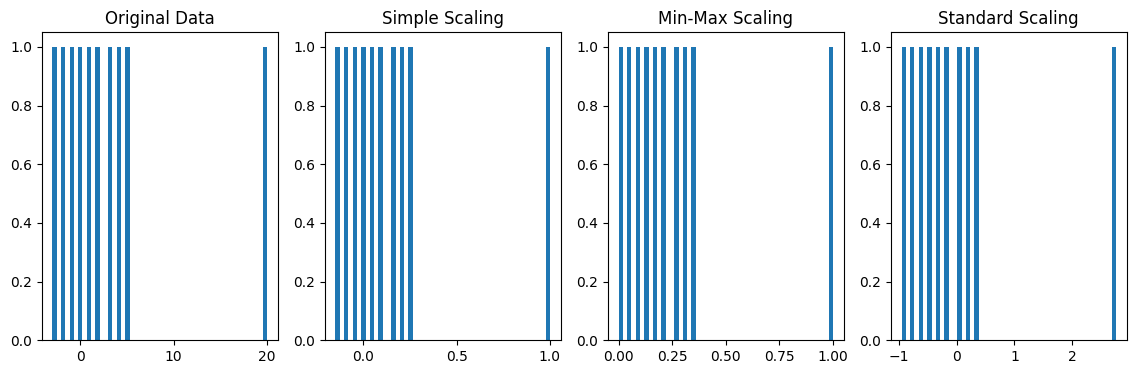

In [22]:
### 원본 데이터
plt.figure(figsize=(14,4))
plt.subplot(1,4,1)
plt.hist(X, bins =50)
plt.title("Original Data")

### Simple Scaling
plt.subplot(1,4,2)
plt.hist(X_simple, bins =50)
plt.title("Simple Scaling")


#### Min-Max Scaling
plt.subplot(1,4,3)
plt.hist(X_minmax2, bins =50)
plt.title("Min-Max Scaling")

#### Standard Scaling
plt.subplot(1,4,4)
plt.hist(X_standard2, bins =50)
plt.title("Standard Scaling")